In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(7)

In [6]:
df = pd.read_csv('airline-passengers.csv', usecols=[1])

In [7]:
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [8]:
## converting dataframe into numpy array
df = df.values

In [9]:
## changing the datatype
df = df.astype('float32')

In [10]:
## Scaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [11]:
df

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [13]:
train_size = int(len(df) * 0.67)
test_size = len(df)-train_size
train,test = df[0:train_size,:], df[train_size:len(df)]
print(len(train), len(test))

96 48


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [15]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
## model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 2s - 21ms/step - loss: 0.0471
Epoch 2/100
94/94 - 0s - 1ms/step - loss: 0.0235
Epoch 3/100
94/94 - 0s - 1ms/step - loss: 0.0171
Epoch 4/100
94/94 - 0s - 1ms/step - loss: 0.0156
Epoch 5/100
94/94 - 0s - 1ms/step - loss: 0.0145
Epoch 6/100
94/94 - 0s - 1ms/step - loss: 0.0137
Epoch 7/100
94/94 - 0s - 1ms/step - loss: 0.0126
Epoch 8/100
94/94 - 0s - 1ms/step - loss: 0.0114
Epoch 9/100
94/94 - 0s - 1ms/step - loss: 0.0100
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0085
Epoch 11/100
94/94 - 0s - 1ms/step - loss: 0.0069
Epoch 12/100
94/94 - 0s - 1ms/step - loss: 0.0055
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0043
Epoch 14/100
94/94 - 0s - 1ms/step - loss: 0.0034
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0028
Epoch 16/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 17/100
94/94 - 0s - 1ms/step - loss: 0.0024
Epoch 18/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 1ms/step - loss: 0.0021
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0021
Epoch 21

In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [18]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [19]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [25]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df)-1, :] = testPredict

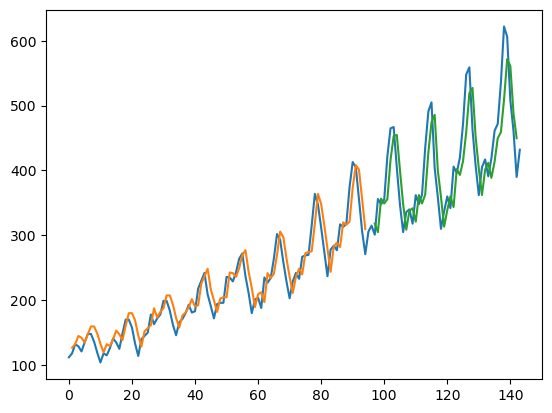

In [26]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()